In [1]:
pip install matplotlib numpy pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 76.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 135.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


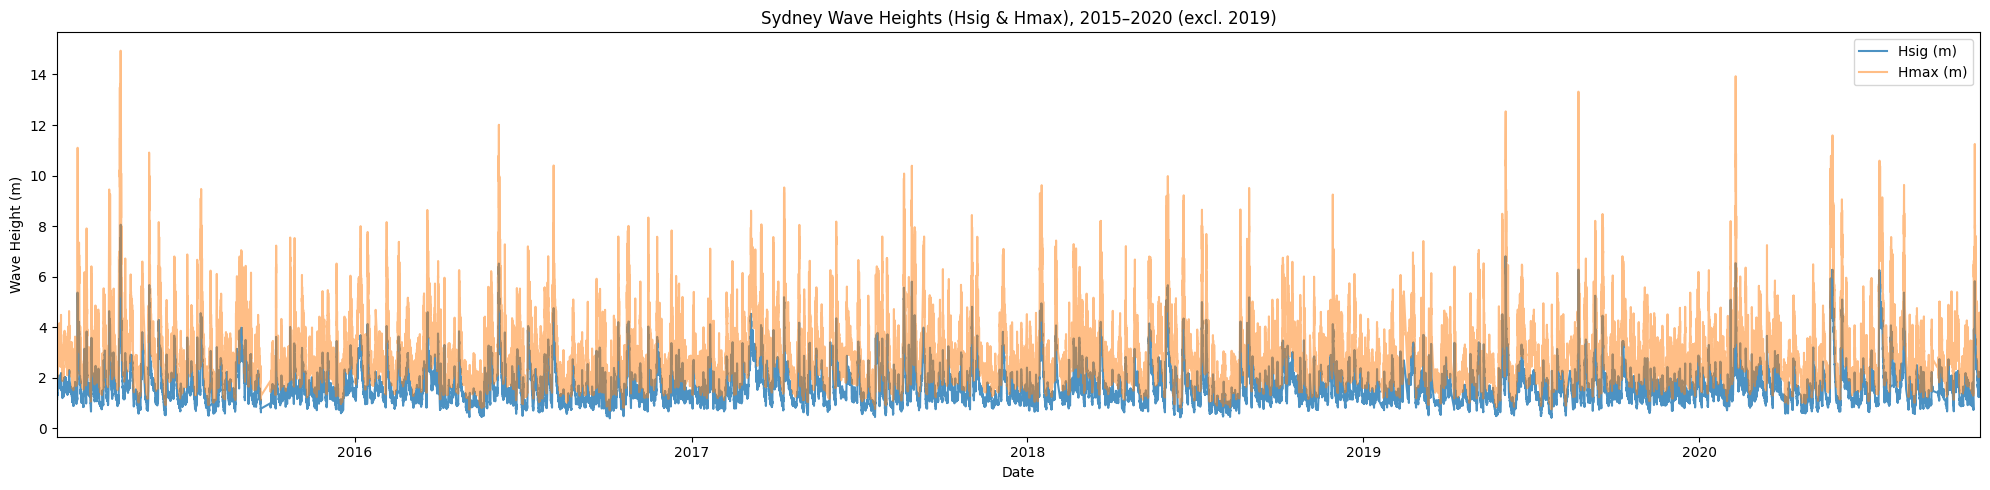

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

# List of your Excel files for each year (update paths as needed)
excel_files = [
    "2015_SYDDOW.xlsx",
    "2016_SYDDOW.xlsx",
    "2017_SYDDOW.xlsx",
    "2018_SYDDOW.xlsx",
    "2019_SYDDOW.xlsx",
    "2020_SYDDOW.xlsx"
]

# Read and concatenate all years
dfs = []
for file in excel_files:
    df = pd.read_excel(file, parse_dates=["Timestamp"])
    dfs.append(df)
wave_data = pd.concat(dfs, ignore_index=True)

# Sort by Timestamp just in case
wave_data = wave_data.sort_values("Timestamp")

xmin = wave_data['Timestamp'].min()
xmax = wave_data['Timestamp'].max()

# Plot Hsig and Hmax
plt.figure(figsize=(20, 5))
plt.plot(wave_data["Timestamp"], wave_data["Hsig (m)"], label="Hsig (m)", alpha=0.8)
plt.plot(wave_data["Timestamp"], wave_data["Hmax (m)"], label="Hmax (m)", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Wave Height (m)")
plt.title("Sydney Wave Heights (Hsig & Hmax), 2015–2020 (excl. 2019)")
plt.legend()
plt.xlim(xmin, xmax)  # This removes the gaps at the start and end
plt.tight_layout()
plt.show()

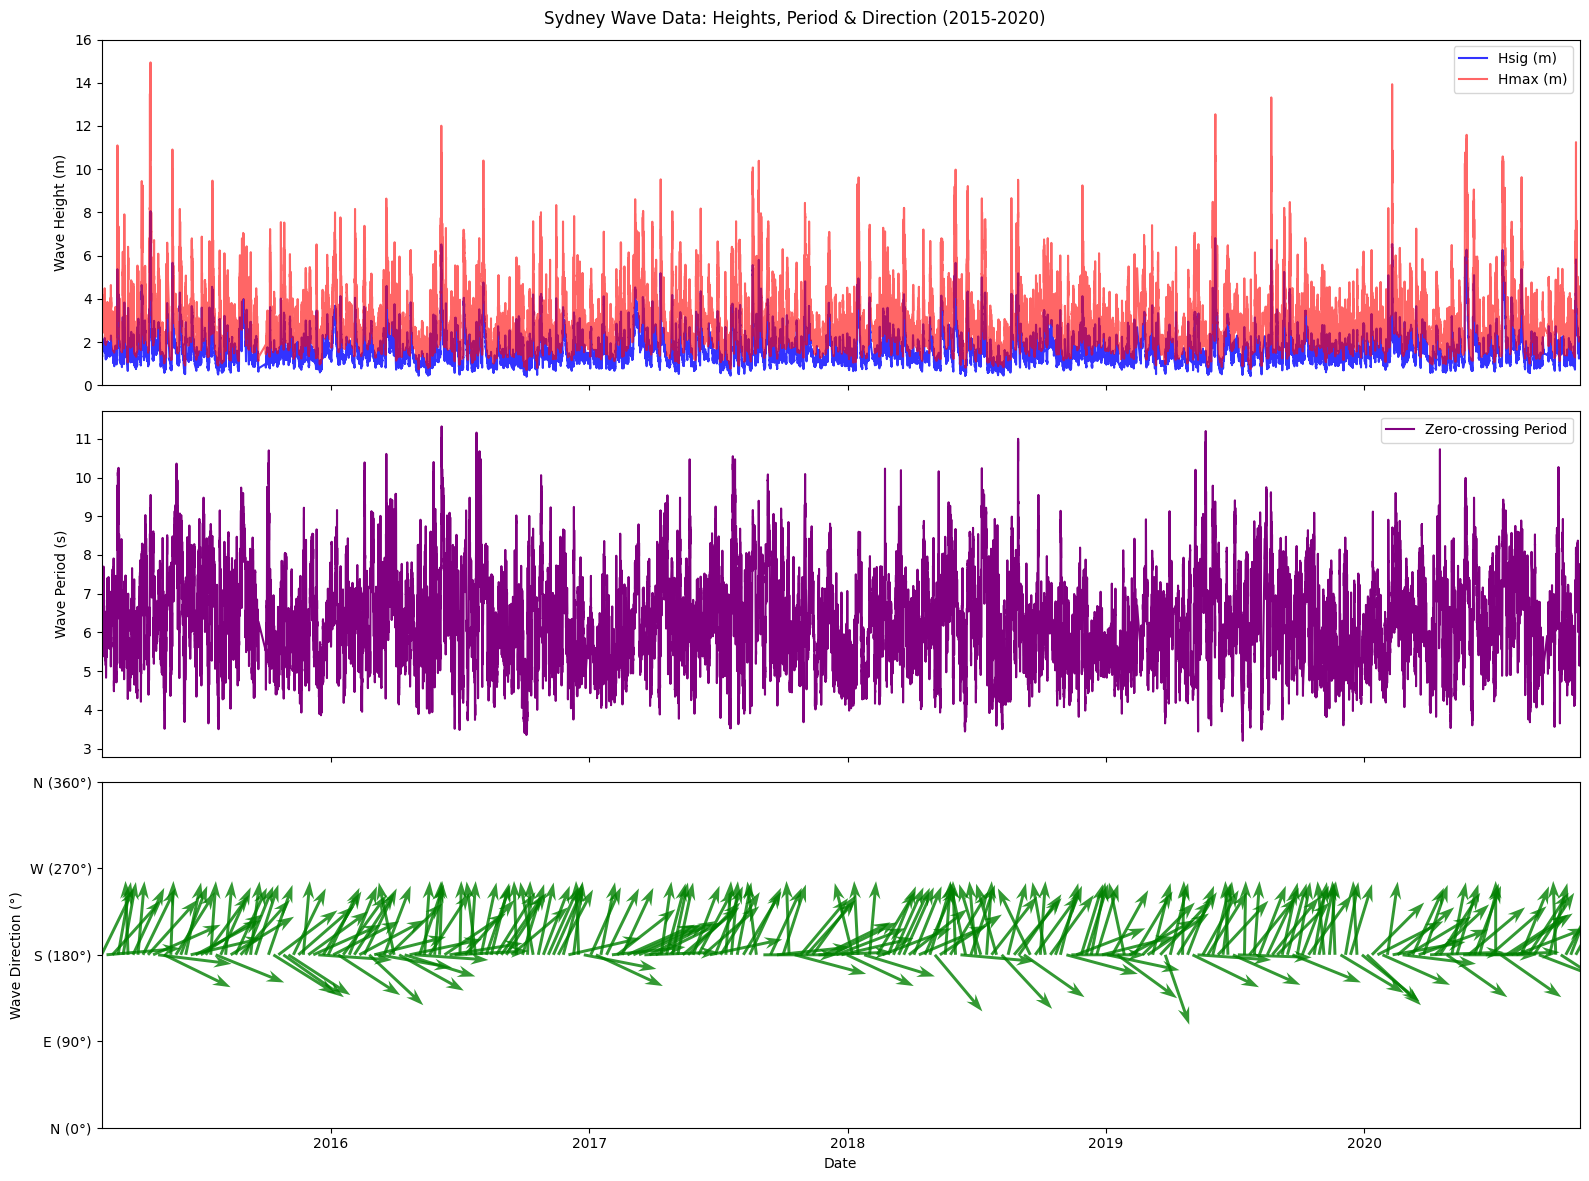

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# List of Excel files
excel_files = [
    "2015_SYDDOW.xlsx",
    "2016_SYDDOW.xlsx", 
    "2017_SYDDOW.xlsx",
    "2018_SYDDOW.xlsx",
    "2019_SYDDOW.xlsx",
    "2020_SYDDOW.xlsx"
]

# Load and concatenate all data
def load_all_sheets(file):
    xls = pd.ExcelFile(file)
    df_list = []
    for sheet in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet, parse_dates=["Timestamp"])
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# Concatenate all years
wave_data = pd.concat([load_all_sheets(f) for f in excel_files], ignore_index=True)
wave_data = wave_data.sort_values("Timestamp").dropna(subset=["Timestamp"])

# Convert wave direction to numeric
wave_data["WDIR_BUOY (deg TN)"] = pd.to_numeric(wave_data["WDIR_BUOY (deg TN)"], errors="coerce")

# Set x-axis limits
xmin = wave_data["Timestamp"].min()
xmax = wave_data["Timestamp"].max()

# Create 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# 1. Wave Heights (Top)
ax1.plot(wave_data["Timestamp"], wave_data["Hsig (m)"], label="Hsig (m)", color="blue", alpha=0.8)
ax1.plot(wave_data["Timestamp"], wave_data["Hmax (m)"], label="Hmax (m)", color="red", alpha=0.6)
ax1.set_ylabel("Wave Height (m)")
ax1.legend()
ax1.set_ylim(0, 16)

# 2. Wave Period (Middle)
ax2.plot(wave_data["Timestamp"], wave_data["Tz (s)"], color="purple", label="Zero-crossing Period")
ax2.set_ylabel("Wave Period (s)")
ax2.legend()

# 3. Wave Direction (Bottom) - Fixed arrows
# Sample every 7 days for cleaner arrows
sample_freq = 24 * 7  # Every 7 days if hourly data
arrow_indices = np.arange(0, len(wave_data), sample_freq)

times_arrows = wave_data["Timestamp"].iloc[arrow_indices]
directions_arrows = wave_data["WDIR_BUOY (deg TN)"].iloc[arrow_indices]

# Remove NaN directions
valid_mask = ~np.isnan(directions_arrows)
times_arrows = times_arrows[valid_mask]
directions_arrows = directions_arrows[valid_mask]

# Convert to radians and create arrow components
radians = np.deg2rad(directions_arrows - 90)  # Convert from North=0 to East=0
dx = np.cos(radians)
dy = np.sin(radians)

# Plot arrows at y=180 (middle of 0-360 range)
y_arrows = np.full(len(times_arrows), 180)

ax3.quiver(times_arrows, y_arrows, dx, dy, 
          scale=20, width=0.002, color='green', 
          headwidth=4, headlength=6, alpha=0.8)
ax3.set_ylabel("Wave Direction (°)")
ax3.set_ylim(0, 360)
ax3.set_yticks([0, 90, 180, 270, 360])
ax3.set_yticklabels(['N (0°)', 'E (90°)', 'S (180°)', 'W (270°)', 'N (360°)'])

# Set x-axis limits for all subplots
ax1.set_xlim(xmin, xmax)
ax2.set_xlim(xmin, xmax) 
ax3.set_xlim(xmin, xmax)

ax3.set_xlabel("Date")
plt.suptitle("Sydney Wave Data: Heights, Period & Direction (2015-2020)", y=0.98)
plt.tight_layout()
plt.show()


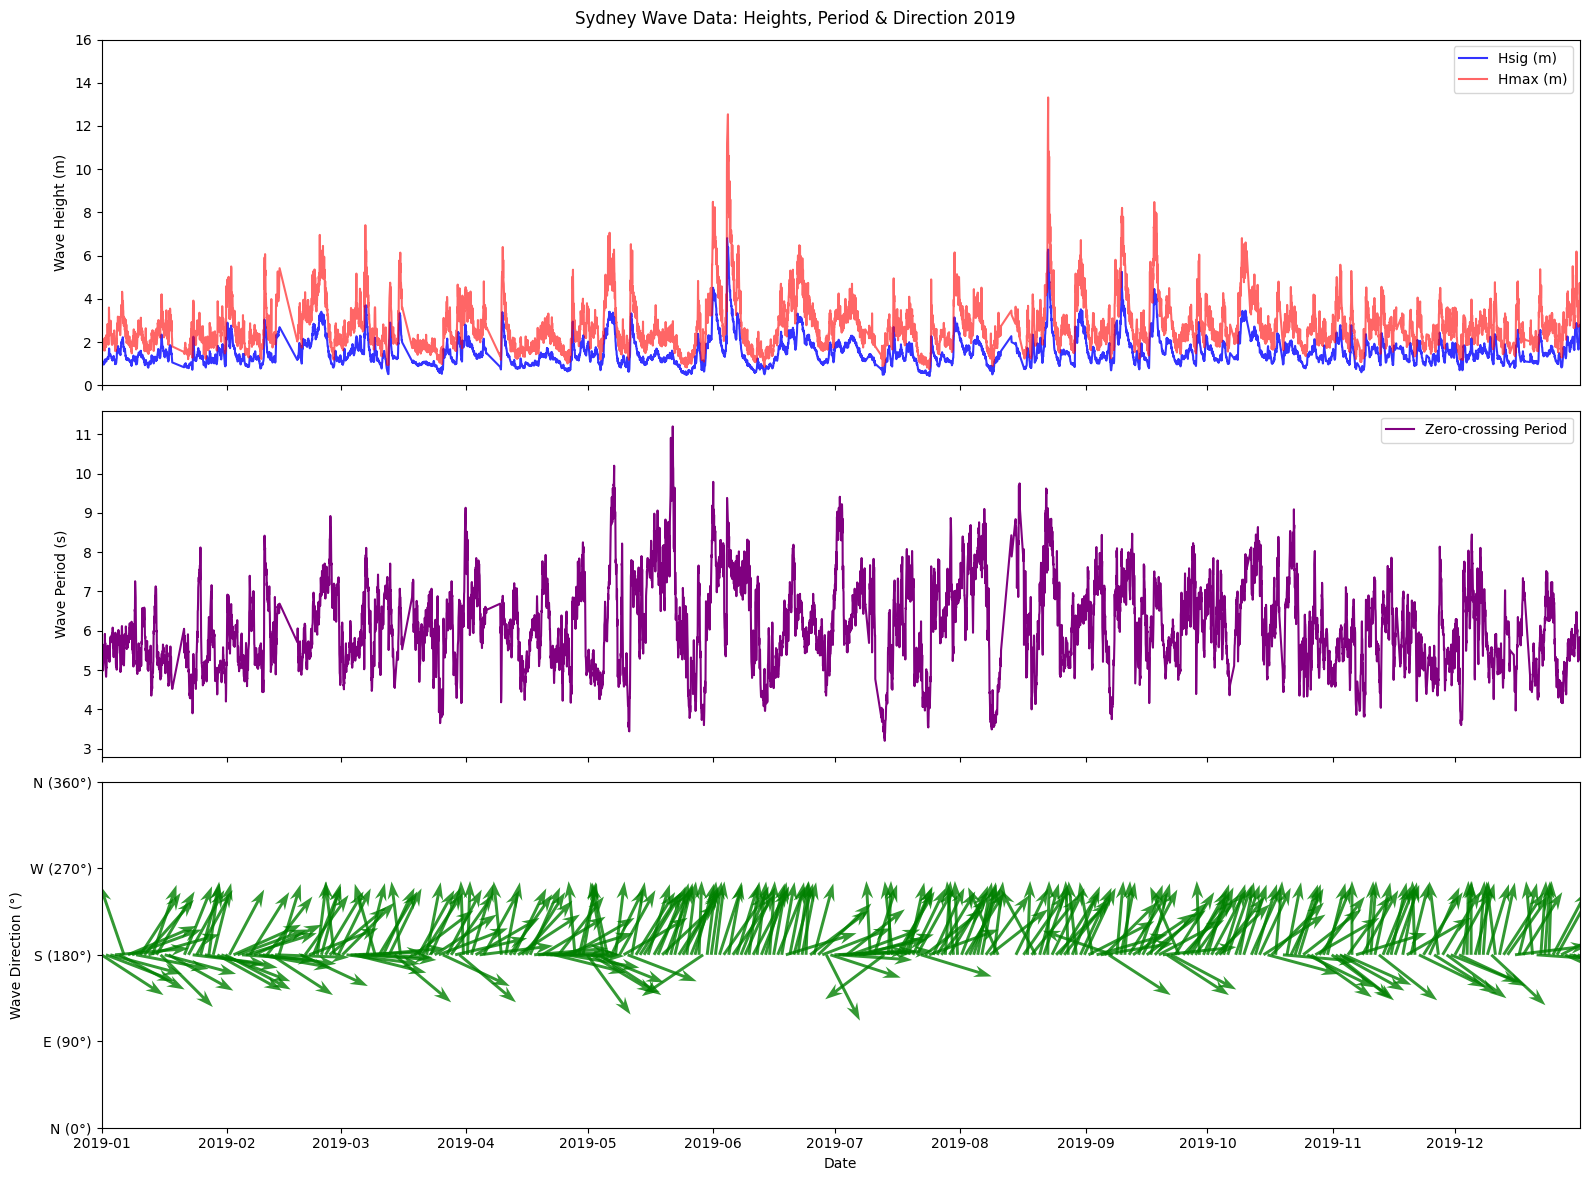

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# List of Excel files
excel_files = [
    "2019_SYDDOW.xlsx"
]

# Load and concatenate all data
def load_all_sheets(file):
    xls = pd.ExcelFile(file)
    df_list = []
    for sheet in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet, parse_dates=["Timestamp"])
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# Concatenate all years
wave_data = pd.concat([load_all_sheets(f) for f in excel_files], ignore_index=True)
wave_data = wave_data.sort_values("Timestamp").dropna(subset=["Timestamp"])

# Convert wave direction to numeric
wave_data["WDIR_BUOY (deg TN)"] = pd.to_numeric(wave_data["WDIR_BUOY (deg TN)"], errors="coerce")

# Set x-axis limits
xmin = wave_data["Timestamp"].min()
xmax = wave_data["Timestamp"].max()

# Create 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# 1. Wave Heights (Top)
ax1.plot(wave_data["Timestamp"], wave_data["Hsig (m)"], label="Hsig (m)", color="blue", alpha=0.8)
ax1.plot(wave_data["Timestamp"], wave_data["Hmax (m)"], label="Hmax (m)", color="red", alpha=0.6)
ax1.set_ylabel("Wave Height (m)")
ax1.legend()
ax1.set_ylim(0, 16)

# 2. Wave Period (Middle)
ax2.plot(wave_data["Timestamp"], wave_data["Tz (s)"], color="purple", label="Zero-crossing Period")
ax2.set_ylabel("Wave Period (s)")
ax2.legend()

# 3. Wave Direction (Bottom) - Fixed arrows
# Sample every 7 days for cleaner arrows
sample_freq = 24 * 1  # Every 7 days if hourly data
arrow_indices = np.arange(0, len(wave_data), sample_freq)

times_arrows = wave_data["Timestamp"].iloc[arrow_indices]
directions_arrows = wave_data["WDIR_BUOY (deg TN)"].iloc[arrow_indices]

# Remove NaN directions
valid_mask = ~np.isnan(directions_arrows)
times_arrows = times_arrows[valid_mask]
directions_arrows = directions_arrows[valid_mask]

# Convert to radians and create arrow components
radians = np.deg2rad(directions_arrows - 90)  # Convert from North=0 to East=0
dx = np.cos(radians)
dy = np.sin(radians)

# Plot arrows at y=180 (middle of 0-360 range)
y_arrows = np.full(len(times_arrows), 180)

ax3.quiver(times_arrows, y_arrows, dx, dy, 
          scale=20, width=0.002, color='green', 
          headwidth=4, headlength=6, alpha=0.8)
ax3.set_ylabel("Wave Direction (°)")
ax3.set_ylim(0, 360)
ax3.set_yticks([0, 90, 180, 270, 360])
ax3.set_yticklabels(['N (0°)', 'E (90°)', 'S (180°)', 'W (270°)', 'N (360°)'])

# Set x-axis limits for all subplots
ax1.set_xlim(xmin, xmax)
ax2.set_xlim(xmin, xmax) 
ax3.set_xlim(xmin, xmax)

ax3.set_xlabel("Date")
plt.suptitle("Sydney Wave Data: Heights, Period & Direction 2019", y=0.98)
plt.tight_layout()
plt.show()
